<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [143]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Data Cleaning

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from datetime import datetime, date
from sklearn.cluster import KMeans

## Order Dataset

In [145]:
order_df = pd.read_csv('olist_orders_dataset.csv')

In [146]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [147]:
order_df.drop(['order_status', 'order_delivered_carrier_date'], axis='columns', inplace=True)

In [148]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(6)
memory usage: 4.6+ MB


In [149]:
order_df.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26 00:00:00


In [150]:
order_df[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date']]


,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...
99436,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15 00:00:00


In [151]:
for column in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date']:
    print(column)
    order_df[column] = pd.to_datetime(order_df[column])
order_df.info()

order_purchase_timestamp
order_approved_at
order_delivered_customer_date
order_estimated_delivery_date
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_purchase_timestamp         99441 non-null datetime64[ns]
order_approved_at                99281 non-null datetime64[ns]
order_delivered_customer_date    96476 non-null datetime64[ns]
order_estimated_delivery_date    99441 non-null datetime64[ns]
dtypes: datetime64[ns](4), object(2)
memory usage: 4.6+ MB


In [215]:
order_df.order_approved_at.median()

TypeError: DatetimeIndex cannot perform the operation median

In [152]:
order_df[order_df.duplicated()]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date


In [153]:
order_df.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


## Payment Dataset

In [154]:
payment_df = pd.read_csv('olist_order_payments_dataset.csv')

In [155]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [156]:
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [157]:
#payment_df.drop(['payment_sequential', 'payment_type','payment_installments'], axis='columns', inplace=True)
#payment_df.head()

In [158]:
payment_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

## Customer Dataset

In [159]:
customer_df = pd.read_csv('olist_customers_dataset.csv')

In [160]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [161]:
customer_df.drop('customer_zip_code_prefix', axis='columns', inplace=True)
customer_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state'], dtype='object')

In [162]:
customer_df[customer_df.duplicated()]

,customer_id,customer_unique_id,customer_city,customer_state


In [163]:
customer_df.nunique()

customer_id           99441
customer_unique_id    96096
customer_city          4119
customer_state           27
dtype: int64

In [164]:
customer_df.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


In [165]:
customer_df.drop(['customer_city', 'customer_state'], axis='columns', inplace=True)
customer_df.head()

,customer_id,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066


In [166]:
order_df['purchase_date'] = order_df['order_purchase_timestamp'].dt.date
order_df.drop('order_purchase_timestamp', axis='columns', inplace=True)
order_df

,order_id,customer_id,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,2018-02-13
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,2017-03-09
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02,2018-02-06
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27,2017-08-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15,2018-01-08


In [167]:
payment_order_df = pd.merge(payment_df, order_df, how='left', on='order_id')
payment_order_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,purchase_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:15:09,2018-05-09 17:36:51,2018-05-22,2018-04-25
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:18:58,2018-06-29 20:32:09,2018-07-16,2018-06-26
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-14 09:52:34,2017-12-18 17:24:41,2018-01-04,2017-12-12
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:13:20,2017-12-21 01:35:51,2018-01-04,2017-12-06
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-05-21 16:14:41,2018-06-01 21:44:53,2018-06-13,2018-05-21
...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,2018-03-10 03:55:25,2018-03-16 13:09:51,2018-04-04,2018-03-08
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,2017-08-18 10:04:56,2017-08-23 22:25:56,2017-09-12,2017-08-18
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,2017-11-18 17:46:05,NaT,2017-12-05,2017-11-18
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,2018-08-07 23:45:00,2018-08-21 22:41:46,2018-08-24,2018-08-07


In [168]:
pay_order_cust_df = pd.merge(payment_order_df, customer_df, how='left', on='customer_id')
pay_order_cust_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,customer_unique_id
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:15:09,2018-05-09 17:36:51,2018-05-22,2018-04-25,708ab75d2a007f0564aedd11139c7708
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:18:58,2018-06-29 20:32:09,2018-07-16,2018-06-26,a8b9d3a27068454b1c98cc67d4e31e6f
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-14 09:52:34,2017-12-18 17:24:41,2018-01-04,2017-12-12,6f70c0b2f7552832ba46eb57b1c5651e
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:13:20,2017-12-21 01:35:51,2018-01-04,2017-12-06,87695ed086ebd36f20404c82d20fca87
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-05-21 16:14:41,2018-06-01 21:44:53,2018-06-13,2018-05-21,4291db0da71914754618cd789aebcd56
...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,2018-03-10 03:55:25,2018-03-16 13:09:51,2018-04-04,2018-03-08,b6027ac07fb76ebca8c97b1887865aee
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,2017-08-18 10:04:56,2017-08-23 22:25:56,2017-09-12,2017-08-18,53b30ca78efb2b7efcd3f9e461587eb2
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,2017-11-18 17:46:05,NaT,2017-12-05,2017-11-18,d3c7da954a324253814096bcaf240e4e
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,2018-08-07 23:45:00,2018-08-21 22:41:46,2018-08-24,2018-08-07,b84dc68f02f122a88d7e7bbd37b06204


# Exploratory Data Analytics

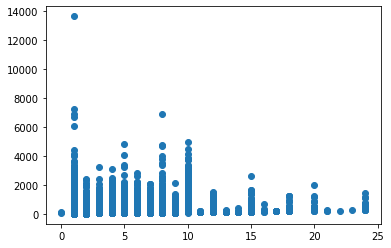

In [170]:
plt.scatter(pay_order_cust_df.payment_installments, pay_order_cust_df.payment_value)

In [195]:
pay_order_cust_df['delay'] = (pay_order_cust_df.order_delivered_customer_date-pay_order_cust_df.order_estimated_delivery_date).dt.days
pay_order_cust_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,customer_unique_id,delay
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:15:09,2018-05-09 17:36:51,2018-05-22,2018-04-25,708ab75d2a007f0564aedd11139c7708,-13.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:18:58,2018-06-29 20:32:09,2018-07-16,2018-06-26,a8b9d3a27068454b1c98cc67d4e31e6f,-17.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-14 09:52:34,2017-12-18 17:24:41,2018-01-04,2017-12-12,6f70c0b2f7552832ba46eb57b1c5651e,-17.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:13:20,2017-12-21 01:35:51,2018-01-04,2017-12-06,87695ed086ebd36f20404c82d20fca87,-14.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-05-21 16:14:41,2018-06-01 21:44:53,2018-06-13,2018-05-21,4291db0da71914754618cd789aebcd56,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,2018-03-10 03:55:25,2018-03-16 13:09:51,2018-04-04,2018-03-08,b6027ac07fb76ebca8c97b1887865aee,-19.0
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,2017-08-18 10:04:56,2017-08-23 22:25:56,2017-09-12,2017-08-18,53b30ca78efb2b7efcd3f9e461587eb2,-20.0
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,2017-11-18 17:46:05,NaT,2017-12-05,2017-11-18,d3c7da954a324253814096bcaf240e4e,NaN
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,2018-08-07 23:45:00,2018-08-21 22:41:46,2018-08-24,2018-08-07,b84dc68f02f122a88d7e7bbd37b06204,-3.0


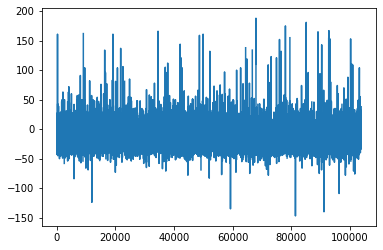

In [197]:
plt.plot(pay_order_cust_df.delay)

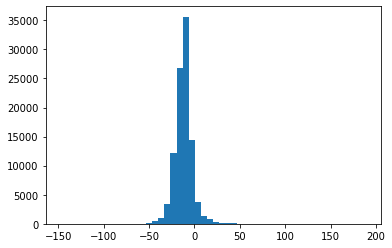

In [211]:
plt.hist(pay_order_cust_df.delay, bins=50);

In [216]:
pay_order_cust_df.fillna(pay_order_cust_df.median(), inplace=True)

In [217]:
poc1_df = pay_order_cust_df[(date(2016,10,1) <= pay_order_cust_df.purchase_date) &
                              (pay_order_cust_df.purchase_date < date(2017,10,1))]
poc2_df = pay_order_cust_df[(date(2017,10,1) <= pay_order_cust_df.purchase_date) & 
                              (pay_order_cust_df.purchase_date < date(2018,10,1))]

In [218]:
df1 = poc1_df.groupby('customer_unique_id').agg({'payment_installments':'mean', 'delay':'max'})
df1

,payment_installments,delay
customer_unique_id,,
0000f46a3911fa3c0805444483337064,8.0,-2.0
0005e1862207bf6ccc02e4228effd9a0,3.0,-28.0
0006fdc98a402fceb4eb0ee528f6a8d4,2.0,-12.0
000a5ad9c4601d2bbdd9ed765d5213b3,3.0,-15.0
000bfa1d2f1a41876493be685390d6d3,4.0,-13.0
...,...,...
fff3a9369e4b7102fab406a334a678c3,2.0,-7.0
fff699c184bcc967d62fa2c6171765f7,1.0,-7.0
fffcf5a5ff07b0908bd4e2dbc735a684,10.0,-27.0


In [ ]:
df2 = poc2_df.groupby('customer_unique_id').agg({'payment_value':'sum'})
df2

In [ ]:
common_cust = pd.merge(df1, df2, on='customer_unique_id')
common_cust

In [178]:
X = common_cust.iloc[:,:-1]
y = common_cust.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# logistic regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Train Accuracy: ', lr.score(X_train, y_train))
print('Test Accuracy: ', lr.score(X_test, y_test))

Train Accuracy:  0.009888885215519116
Test Accuracy:  0.017028573279868287


In [32]:
rfm1_df = poc1_df.groupby('customer_unique_id').agg({'purchase_date':'max', 'order_id':'count', 'payment_value':'sum'})
rfm1_df.columns = ['recency', 'frequency', 'monetary']
rfm1_df

,recency,frequency,monetary
customer_unique_id,,,
0000f46a3911fa3c0805444483337064,2017-03-10,1,86.22
0005e1862207bf6ccc02e4228effd9a0,2017-03-04,1,150.12
0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18,1,29.00
000a5ad9c4601d2bbdd9ed765d5213b3,2017-08-11,1,91.28
000bfa1d2f1a41876493be685390d6d3,2017-09-29,1,46.85
...,...,...,...
fff3a9369e4b7102fab406a334a678c3,2017-08-11,1,102.74
fff699c184bcc967d62fa2c6171765f7,2017-09-01,1,55.00
fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,1,2067.42


In [34]:
rfm1_df.recency = rfm1_df.recency.apply(lambda x: (poc1_df.purchase_date.max()-x).days)
rfm1_df

,recency,frequency,monetary
customer_unique_id,,,
0000f46a3911fa3c0805444483337064,204,1,86.22
0005e1862207bf6ccc02e4228effd9a0,210,1,150.12
0006fdc98a402fceb4eb0ee528f6a8d4,74,1,29.00
000a5ad9c4601d2bbdd9ed765d5213b3,50,1,91.28
000bfa1d2f1a41876493be685390d6d3,1,1,46.85
...,...,...,...
fff3a9369e4b7102fab406a334a678c3,50,1,102.74
fff699c184bcc967d62fa2c6171765f7,29,1,55.00
fffcf5a5ff07b0908bd4e2dbc735a684,114,1,2067.42


In [9]:
#rfm1_df = pd.read_csv('rfm3m.csv', index_col=0)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm1_df)
X_scaled = scaler.transform(rfm1_df)
rfm1_km = KMeans(n_clusters=4).fit(X_scaled)

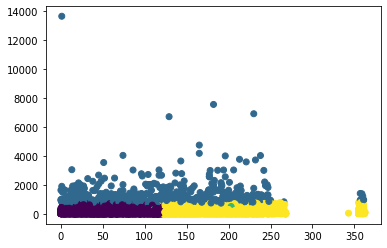

In [37]:
plt.scatter(rfm1_df.recency, rfm1_df.monetary, c=rfm1_km.labels_)

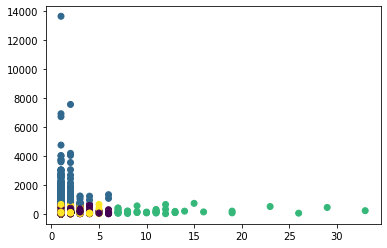

In [38]:
plt.scatter(rfm1_df.frequency, rfm1_df.monetary, c=rfm1_km.labels_)

In [39]:
rfm2_df = poc2_df.groupby('customer_unique_id').agg({'purchase_date':'max', 'order_id':'count', 'payment_value':'sum'})
rfm2_df.columns = ['recency', 'frequency', 'monetary']
rfm2_df

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,27.19
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,43.62
0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,196.89
0004bd2a26a76fe21f786e4fbd80607f,2018-04-05,1,166.98
...,...,...,...
fffb09418989a0dbff854a28163e47c6,2017-12-17,1,73.16
fffbf87b7a1a6fa8b03f081c5f51a201,2017-12-27,1,167.32
fffcc512b7dfecaffd80f13614af1d16,2018-04-11,1,710.70


In [40]:
m2 = rfm2_df[['monetary']]

In [42]:
clust1_df = pd.DataFrame()
clust1_df['customer_unique_id'] = rfm1_df.index
clust1_df['segment'] = rfm1_km.labels_
clust1_df

,customer_unique_id,segment
0,0000f46a3911fa3c0805444483337064,3
1,0005e1862207bf6ccc02e4228effd9a0,3
2,0006fdc98a402fceb4eb0ee528f6a8d4,0
3,000a5ad9c4601d2bbdd9ed765d5213b3,0
4,000bfa1d2f1a41876493be685390d6d3,0
...,...,...
26764,fff3a9369e4b7102fab406a334a678c3,0
26765,fff699c184bcc967d62fa2c6171765f7,0
26766,fffcf5a5ff07b0908bd4e2dbc735a684,1
26767,ffff371b4d645b6ecea244b27531430a,3


In [43]:
common_cust = pd.merge(clust1_df, m2, on='customer_unique_id')
common_cust

,customer_unique_id,segment,monetary
0,004288347e5e88a27ded2bb23747066c,0,103.28
1,004b45ec5c64187465168251cd1c9c2f,0,49.85
2,011b4adcd54683b480c4d841250a987f,0,149.88
3,012452d40dafae4df401bced74cdb490,0,340.07
4,0178b244a5c281fb2ade54038dd4b161,3,157.86
...,...,...,...
634,fcd0ab79592faab19e2bf386cf69fbcd,3,67.13
635,fd09c64a101e3eff4adbca1b28552514,0,36.35
636,fd47af963b760f05fbc357474509905e,0,71.14
637,fe3e52de024b82706717c38c8e183084,0,72.14


In [45]:
X = np.array(common_cust.segment).reshape(-1, 1)
y = common_cust.monetary

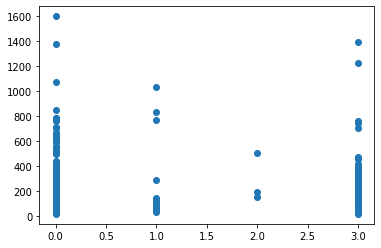

In [46]:
plt.scatter(X, y)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.0012806073677117391
-0.004563608219597892


In [49]:
lr.coef_

array([-4.52613465])

In [51]:
rfm1_m2_df = pd.merge(rfm1_df, m2, left_index=True, right_index=True)
rfm1_m2_df

,recency,frequency,monetary_x,monetary_y
customer_unique_id,,,,
004288347e5e88a27ded2bb23747066c,65,1,251.09,103.28
004b45ec5c64187465168251cd1c9c2f,29,1,97.87,49.85
011b4adcd54683b480c4d841250a987f,39,1,86.42,149.88
012452d40dafae4df401bced74cdb490,104,1,155.26,340.07
0178b244a5c281fb2ade54038dd4b161,143,1,102.03,157.86
...,...,...,...,...
fcd0ab79592faab19e2bf386cf69fbcd,232,1,45.95,67.13
fd09c64a101e3eff4adbca1b28552514,44,1,52.37,36.35
fd47af963b760f05fbc357474509905e,17,1,71.14,71.14


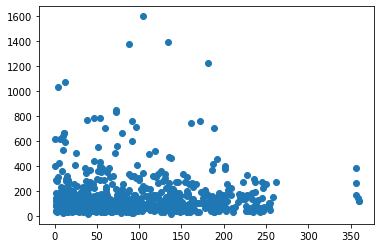

In [53]:
plt.scatter(rfm1_m2_df.recency, rfm1_m2_df.monetary_y)

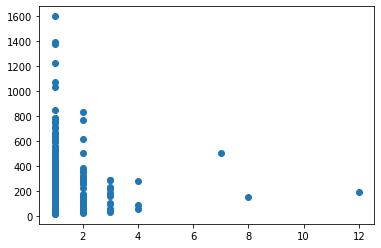

In [54]:
plt.scatter(rfm1_m2_df.frequency, rfm1_m2_df.monetary_y)

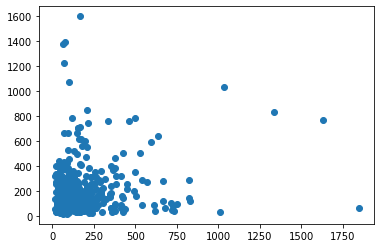

In [55]:
plt.scatter(rfm1_m2_df.monetary_x, rfm1_m2_df.monetary_y)

In [56]:
X = rfm1_m2_df.iloc[:,:-1]
y = rfm1_m2_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# logistic regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Train Accuracy: ', lr.score(X_train, y_train))
print('Test Accuracy: ', lr.score(X_test, y_test))

Train Accuracy:  0.08100490550724626
Test Accuracy:  -0.08243098475003774


In [57]:
lr.coef_

array([-0.1103705 , -2.37531609,  0.29471644])

In [52]:
common_cust[['monetary']]

,monetary
0,55.09
1,168.36
2,215.06
3,25.77
4,113.57
...,...
191,319.58
192,54.09
193,179.86
194,79.20


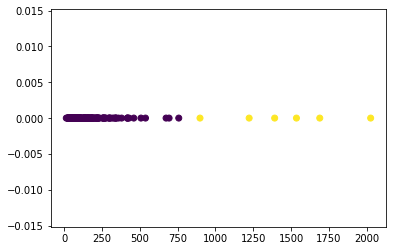

In [57]:
m6m_km = KMeans(n_clusters=2)
m6m_km.fit(common_cust[['monetary']])
plt.scatter(common_cust.monetary, np.zeros([1,common_cust.shape[0]]), c=m6m_km.labels_)

In [68]:
1-m6m_km.labels_.mean()

0.9693877551020408

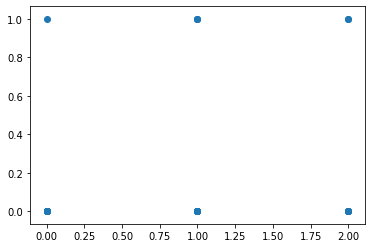

In [69]:
plt.scatter(common_cust.rfm_clust_3m, m6m_km.labels_)

In [65]:
from sklearn.linear_model import LogisticRegression 
clust_lr = LogisticRegression().fit(common_cust[['rfm_clust_3m']], m6m_km.labels_)

C:\Users\arali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
clust_lr.score(common_cust[['rfm_clust_3m']], m6m_km.labels_)

0.9693877551020408